# **Proyek Analisis Data: Nama dataset**
- Kelompok : IF1 - 10124010
- Anggota : </br>
  - 10124010 - Rafi Asshiddiqie Tanujaya </br>
  - 10124017  - Muhammad Fauzi</br>
  - 10124006 - Khairul Indra S

## **Deskripsi Dataset  & Penjelasan Fitur**
Dataset ini berisi data kualitas udara dari stasiun/lokasi pemantauan di sekitar Beijing, China, yang direkam setiap jam dari tahun 2013 hingga 2017. Dataset ini digunakan untuk menganalisis kondisi polusi udara, faktor meteorologis, dan potensi risiko kesehatan berdasarkan polutan utama.

Berikut penjelasan setiap kolom dalam dataset:

### **Identitas Waktu**

* **No**: Nomor urut entri data.
* **year**: Tahun pengambilan sampel kualitas udara.
* **month**: Bulan pengambilan sampel (1–12).
* **day**: Tanggal pengambilan sampel.
* **hour**: Jam spesifik pengambilan sampel (0–23).

### **Polutan Udara Utama**

* **PM2.5**: Partikel halus berukuran ≤2.5 μm yang dapat masuk ke alveoli paru-paru. Bersumber dari kendaraan, industri, asap pembakaran biomassa, kebakaran hutan, hingga debu. Merupakan polutan paling berbahaya bagi kesehatan.
* **PM10**: Partikel udara berukuran ≤10 μm yang berasal dari debu jalan, konstruksi, tanah kering, atau pembakaran.
* **SO2**: Sulfur dioksida, gas hasil pembakaran batu bara/minyak dan peleburan bijih mengandung sulfur. Mampu menyebabkan iritasi dan gangguan pernapasan.
* **NO2**: Nitrogen dioksida, gas berbahaya yang berasal dari pembakaran bahan bakar kendaraan bermotor dan industri. Berperan dalam pembentukan ozon.
* **CO**: Karbon monoksida, gas beracun hasil pembakaran tidak sempurna dari kayu, bensin, gas, dan bahan bakar lainnya. Mengganggu suplai oksigen dalam darah.
* **O3**: Ozon troposferik, polutan sekunder hasil reaksi NO₂ + VOC dengan sinar matahari. Konstituen utama kabut asap fotokimia.

### **Variabel Meteorologi**

* **TEMP**: Suhu udara pada lokasi dan waktu pengukuran.
* **PRES**: Tekanan udara (hPa). Tekanan rendah dapat menyebabkan polutan terkumpul di permukaan.
* **DEWP**: Titik embun yang menunjukkan tingkat kelembapan udara.
* **RAIN**: Curah hujan per jam. Hujan biasanya menurunkan konsentrasi PM2.5 dan PM10.
* **wd**: Wind Direction — Arah angin saat pengukuran (misalnya N, NE, NW, dsb.).
* **WSPM**: Kecepatan angin (m/s). Angin membantu menyebarkan polutan di atmosfer.
* **station**: Nama stasiun pemantauan kualitas udara, yaitu **Aotizhongxin**.

### **Standar WHO untuk Kualitas Udara**

Batas maksimal aman berdasarkan pedoman WHO (rata-rata periodik):

* **PM2.5**: ≤ 15 µg/m³ (24 jam)
* **PM10**: ≤ 45 µg/m³ (24 jam)
* **SO2**: ≤ 40 µg/m³ (24 jam)
* **NO2**: ≤ 25 µg/m³ (24 jam)
* **CO**: ≤ 4 mg/m³ (24 jam)
* **O3**: ≤ 100 µg/m³ (8 jam)

> Catatan: O₃ memiliki standar rerata 8 jam, berbeda dari polutan lainnya.

Untuk mengkalkulasikan maksimal polutan dalam sehari
> Batasan_Maksimum = Jumlah Batas Harian / Jumlah Komponen Polutan
> Batasan_Maksimum = 15 + 45 + 40 + 25 + 4 + 100 / 6 = 38.16 μg/m³

### **Referensi**

* https://whoairquality.shinyapps.io/Air_Quality_Standards_V2_2/
* https://go.walsall.gov.uk/sites/default/files/2023-01/World%20Health%20Organisation%20global%20air%20quality%20guidelines%202021_0.pdf?utm_source=chatgpt.com
* https://www.iqair.com/id/china

## **Pertanyaan Bisnis**

1. Pada jam berapa dalam sehari (Rata-rata) konsentrasi polutan PM2.5 mencapai tingkat tertinggi dan terendah di Stasiun Aotizhongxin? (10124006 - Khairul Indra S)
2. Bagaimana hubungan antara musim dengan pola kenaikan polusi udara PM2.5 di 12 stasiun pemantau? (10124017  - Muhammad Fauzi)
3. Bagaimana tren kualitas udara dari tahun ke tahun, polutan mana yang paling berkontribusi terhadap penurunan kualitas udara, dan apakah terdapat pola musiman yang konsisten? (10124010 - Rafi Asshiddiqie Tanujaya)

## **Library**

### Download Library

In [ ]:
!pip install pandas numpy matplotlib seaborn

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
import seaborn as sns


## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/data_analyst/psd/database/air_condition/'

ds_list = []

for file_name in os.listdir(folder_path):
  if file_name.endswith('.csv'):
    file_path = os.path.join(f'{folder_path + file_name}')
    data = pd.read_csv(file_path)
    ds_list.append(data)

In [ ]:
df = pd.concat(ds_list, ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
420764,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
420765,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
420766,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [ ]:
print('Hasil Kolom dan Baris dari dataset')
print('==================================')
print(f'Total Baris = {df.shape[0]}')
print(f'Total Kolom = {df.shape[1]}')

Hasil Kolom dan Baris dari dataset
Total Baris = 420768
Total Kolom = 18


### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

Identifikasi Strukture Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


> Bedasarkan Informasi Non-Null data diatas `terdapat missing value` di beberapa kolom

Pengecekan Missing Values

In [ ]:
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


> Terdapat missing value pada beberapa colom diatas

In [ ]:
df.isna().groupby(df['station']).sum()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
station,,,,,,,,,,,,,,,,,,
Aotizhongxin,0,0,0,0,0,925,718,935,1023,1776,1719,20,20,20,20,81,14,0
Changping,0,0,0,0,0,774,582,628,667,1521,604,53,50,53,51,140,43,0
Dingling,0,0,0,0,0,779,656,730,1234,2012,1214,53,50,53,51,140,43,0
Dongsi,0,0,0,0,0,750,553,663,1601,3197,664,20,20,20,20,78,14,0
Guanyuan,0,0,0,0,0,616,429,474,659,1753,1173,20,20,20,20,81,14,0
Gucheng,0,0,0,0,0,646,381,507,668,1401,729,51,50,51,43,159,42,0
Huairou,0,0,0,0,0,953,777,980,1639,1422,1151,51,53,53,55,302,49,0
Nongzhanguan,0,0,0,0,0,628,440,446,692,1206,506,20,20,20,20,78,14,0
Shunyi,0,0,0,0,0,913,548,1296,1365,2178,1489,51,51,54,51,483,44,0


> Setiap station memiliki `missing value` pada beberapa kolom dengan jumlah yang banyak

Outlier

Pengecekan Duplikat Data

In [ ]:
print(f'Data yang duplikasi : {df.duplicated().sum()}')

Data yang duplikasi : 0


> Tidak terdapat `duplikasi data`

### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

> Menghapus Kolom `No` karena tidak memiliki makna untuk di analisisi

In [ ]:
df_clean = df.drop(columns='No', axis=1)
df_clean

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
420764,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
420765,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
420766,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [ ]:
df_clean['station'].value_counts()

,count
station,
Shunyi,35064
Dingling,35064
Tiantan,35064
Gucheng,35064
Wanliu,35064
Wanshouxigong,35064
Aotizhongxin,35064
Changping,35064
Huairou,35064


> Setiap Station memiliki distribusi data yang sama

Penanganan Missing Values

In [ ]:
columns_floats = df.select_dtypes(include="float").columns

for col in columns_floats:
  if df_clean[col].isna().sum() > 0:
    df_clean[col] = df_clean[col].fillna(df[col].median())

df_clean

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013,3,1,2,14.0,14.0,7.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013,3,1,3,12.0,12.0,3.0,5.0,900.0,45.0,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013,3,1,4,12.0,12.0,3.0,43.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
420764,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
420765,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
420766,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


Cek Sample data

In [ ]:
df_clean.head(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013,3,1,2,14.0,14.0,7.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013,3,1,3,12.0,12.0,3.0,5.0,900.0,45.0,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013,3,1,4,12.0,12.0,3.0,43.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [ ]:
df_clean.tail(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
420764,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
420765,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
420766,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi
420767,2017,2,28,23,30.0,71.0,11.0,87.0,1200.0,4.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Dongsi


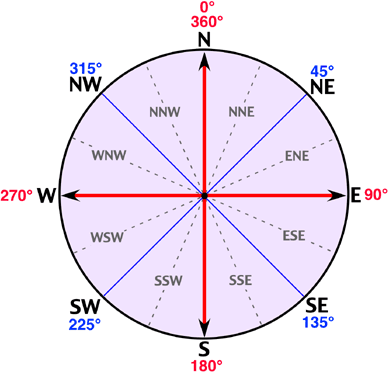

Jika dilihat pada kolom wd terdapat suatu pola dengan contoh:

- NW
---
- NW
- WNW
- NW
- NNW
- NNE

> Terdapat nilai arah angin yang berulang sehinga dapat di anggap `cukup stabil` dan transisi perubahan arah angin yang relatif teratur (tidak berubah drastis dalam waktu dekat), sehingga untuk pengisian missing value akan menggunakan teknik fillna. Pertimbangan untuk tidak menggunakan teknik modus atau median agar data yang di isi lebih variatif

In [ ]:
df_clean['wd'] = df_clean['wd'].ffill()
df_clean

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013,3,1,2,14.0,14.0,7.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013,3,1,3,12.0,12.0,3.0,5.0,900.0,45.0,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013,3,1,4,12.0,12.0,3.0,43.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
420764,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
420765,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
420766,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [ ]:
df_clean.isna().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0


## Exploratory Data Analysis (EDA)

Summary Statistic

In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


> Berdasarkan statistics summaary di atas, hampir semua fitur mengandung outlier kecuali fitur year, month, day, dan hour

### Bagaimana distribusi data pada masing masing fitur?

In [ ]:
highly_skewed = []
moderately_skewed = []
normal_skewed = []

for i in columns_floats:
  value_skew = df_clean[i].skew()
  if value_skew < -1 or value_skew > 1 :
    highly_skewed.append(i)
  elif (value_skew >= -1 and value_skew <= -0.5) or (value_skew <= 1 and value_skew >= 0.5) :
    moderately_skewed.append(i)
  else :
    normal_skewed.append(i)

In [ ]:
for i in highly_skewed :
    print(i, end=", ")

PM2.5, PM10, SO2, NO2, CO, O3, RAIN, WSPM, 

In [ ]:
for i in moderately_skewed :
    print(i, end=", ")

In [ ]:
for i in normal_skewed :
    print(i, end=", ")

TEMP, PRES, DEWP, 

> Fitur `PM2.5, PM10, SO2, NO2, CO, O3, RAIN, WSPM` memiliki distribusi skewness yang sangat condong ke arah tertentu dan fitur `TEMP, PRES, DEWP` memiliki distribusi normal.

Apakah terdapat outlier di setiap fitur?

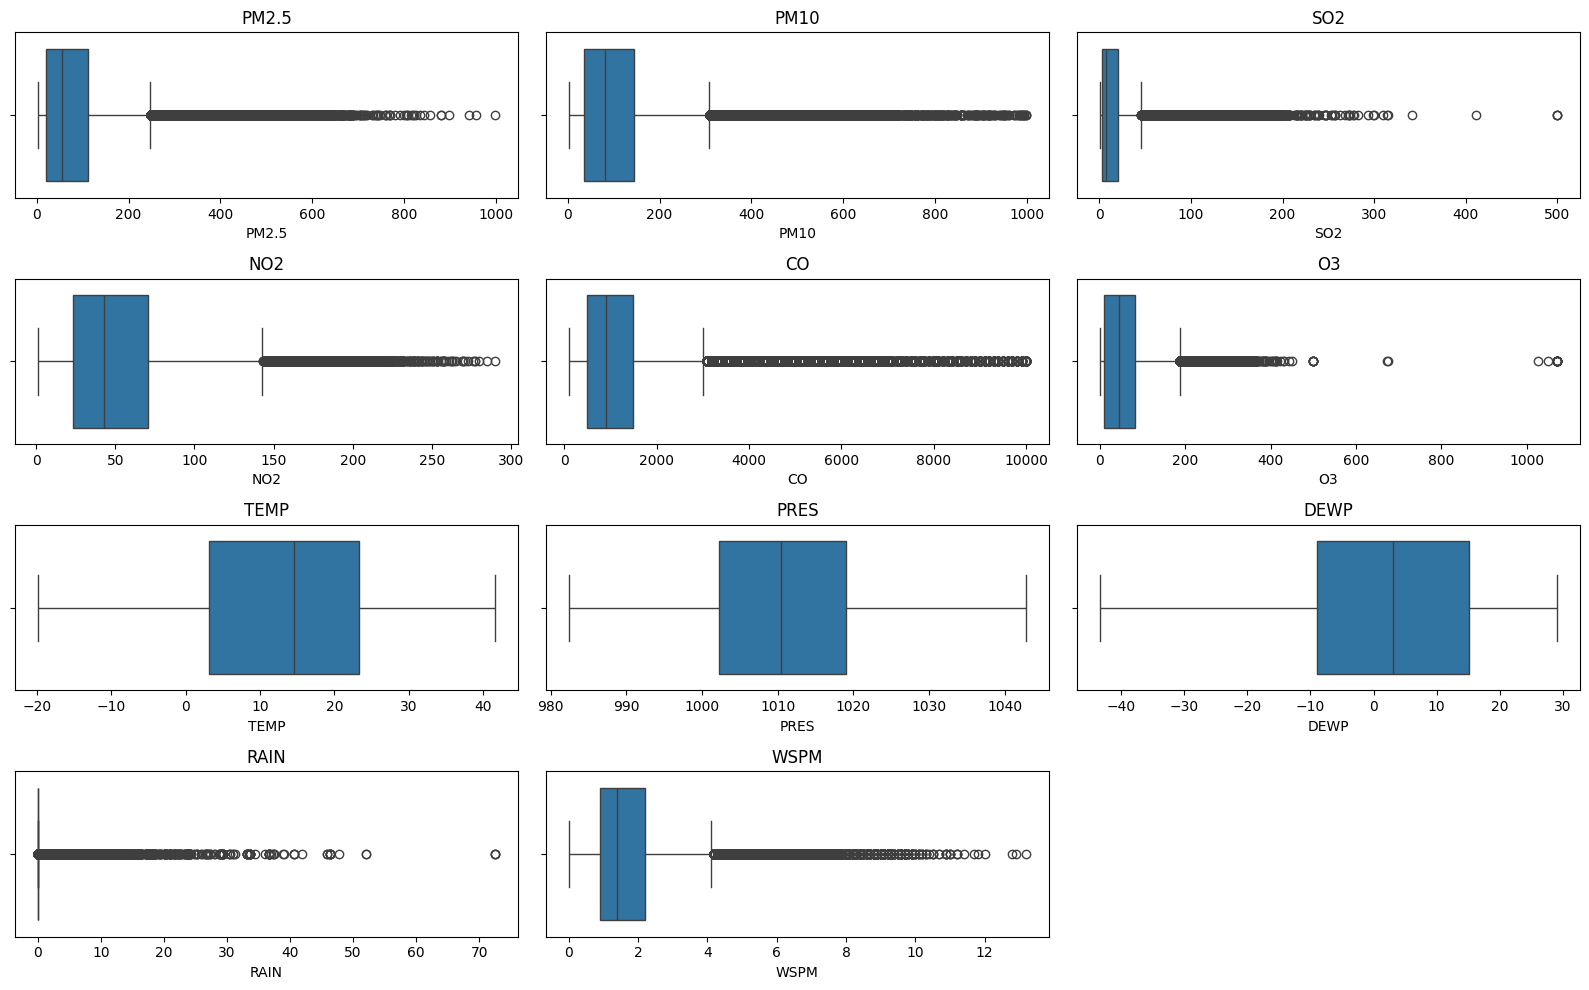

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(columns_floats, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

> Terdapat fitur-fitur yang memiliki outlier, kecuali fitur yang berdistribusi normal.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Pada jam berapa dalam sehari (Rata-rata) konsentrasi polutan PM2.5 mencapai tingkat tertinggi dan terendah di Stasiun Aotizhongxin? (10124006 - Khairul Indra S)


--- Hasil EDA : Rata-rata PM2.5 Berdasarkan Suhu ---
         Temp_Category      PM2.5
0       Dingin (< 0°C)  96.631166
1  Normal (0°C - 30°C)  77.402409
2       Panas (> 30°C)  59.970364


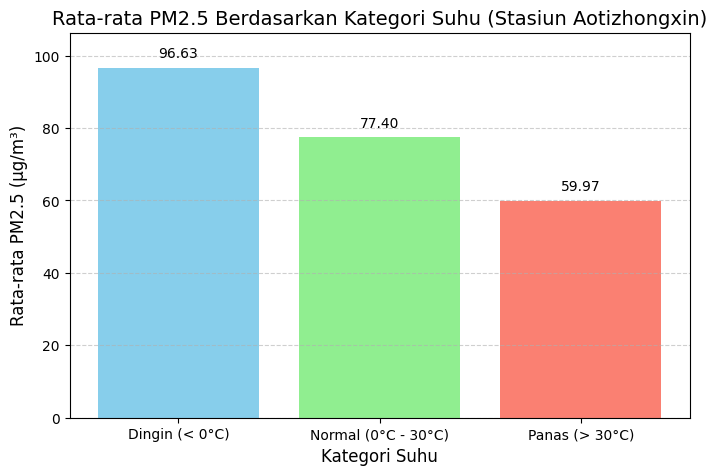

In [ ]:
def categorize_temp(temp):
    if temp < 0:
        return 'Dingin (< 0°C)'
    elif temp > 30:
        return 'Panas (> 30°C)'
    else:
        return 'Normal (0°C - 30°C)'

# Jika df_clean ada, ini akan berhasil. Jika error, ganti df_clean dengan nama DataFrame Anda yang benar.
df_clean['Temp_Category'] = df_clean['TEMP'].apply(categorize_temp)

# 3. Menghitung Rata-rata PM2.5 per Kategori Suhu
pm25_by_temp_category = df_clean.groupby('Temp_Category')['PM2.5'].mean().reset_index()

# 4. Mengurutkan Kategori
order = ['Dingin (< 0°C)', 'Normal (0°C - 30°C)', 'Panas (> 30°C)']
pm25_by_temp_category['Temp_Category'] = pd.Categorical(pm25_by_temp_category['Temp_Category'], categories=order, ordered=True)
pm25_by_temp_category = pm25_by_temp_category.sort_values('Temp_Category')

print("\n--- Hasil EDA : Rata-rata PM2.5 Berdasarkan Suhu ---")
print(pm25_by_temp_category)

plt.figure(figsize=(8, 5))

# Membuat Bar Plot
bars = plt.bar(pm25_by_temp_category['Temp_Category'], pm25_by_temp_category['PM2.5'],
               color=['skyblue', 'lightgreen', 'salmon'])

# Menambahkan label nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2,
             f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Detail Plot
plt.title('Rata-rata PM2.5 Berdasarkan Kategori Suhu (Stasiun Aotizhongxin)', fontsize=14)
plt.xlabel('Kategori Suhu', fontsize=12)
plt.ylabel('Rata-rata PM2.5 (µg/m³)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, pm25_by_temp_category['PM2.5'].max() * 1.1)
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara musim dengan pola kenaikan polusi udara PM2.5 di 12 stasiun pemantau? (10124017 - Muhammad Fauzi)


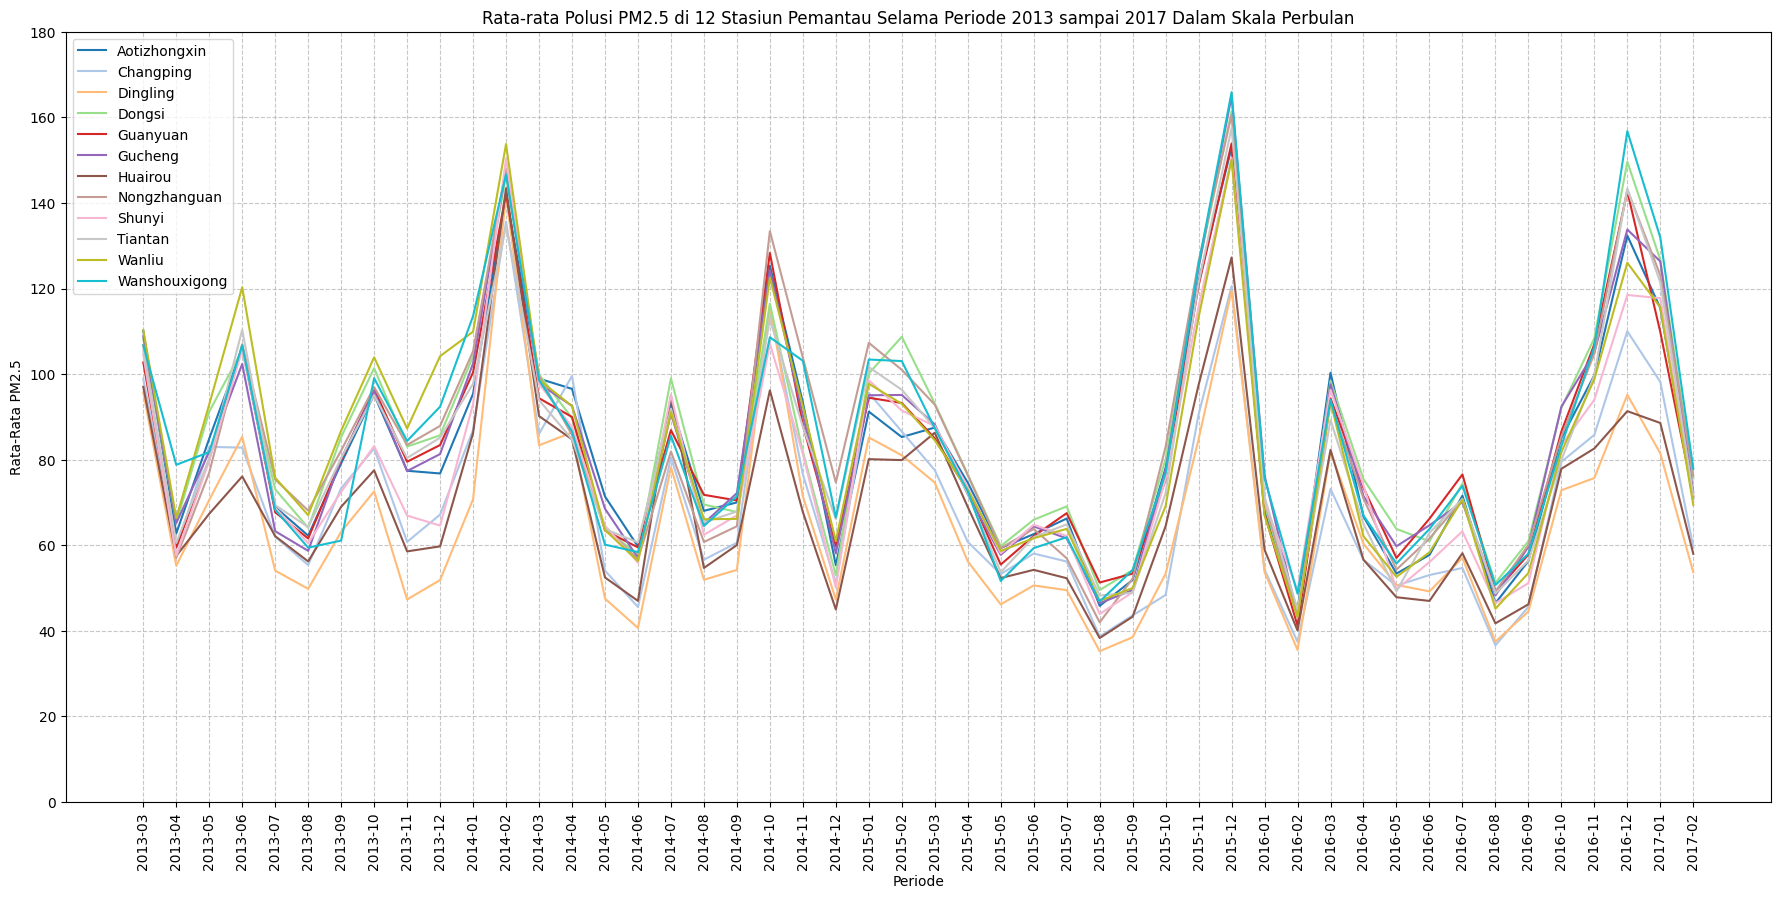

In [ ]:
copy_df = df_clean

copy_df['datetime'] = pd.to_datetime(copy_df[['year', 'month', 'day', 'hour']])

copy_df['year_month'] = copy_df['datetime'].dt.to_period('M')

stations = copy_df['station'].unique()

monthly_avg = (
    copy_df
    .groupby(['station', 'year_month'])['PM2.5']
    .mean()
    .reset_index()
)

color_map = plt.cm.tab20

plt.figure(figsize=(22, 10))

for i, (station, group) in enumerate(monthly_avg.groupby("station")):
    plt.plot(group['year_month'].astype(str), group['PM2.5'], color=color_map(i / len(stations)), label=station)

plt.xticks(rotation=90)
plt.yticks(range(0, 180 + 20, 20))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.legend()
plt.xlabel('Periode')
plt.ylabel('Rata-Rata PM2.5')
plt.title('Rata-rata Polusi PM2.5 di 12 Stasiun Pemantau Selama Periode 2013 sampai 2017 Dalam Skala Perbulan')
plt.show()

### Pertanyaan 3 :Bagaimana tren kualitas udara dari tahun ke tahun, polutan mana yang paling berkontribusi terhadap penurunan kualitas udara, dan apakah terdapat pola musiman yang konsisten? (10124010 - Rafi Asshiddiqie Tanujaya)

In [ ]:
polutans = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

yearly_trend = df.groupby('year')[polutans].median()
yearly_trend

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,59.0,87.0,11.0,47.0,900.0,45.0
2014,63.0,96.0,9.0,48.0,900.0,44.0
2015,52.0,78.0,6.0,40.0,800.0,46.0
2016,48.0,72.0,4.0,38.0,800.0,46.0
2017,46.0,68.0,12.0,51.0,900.0,38.0


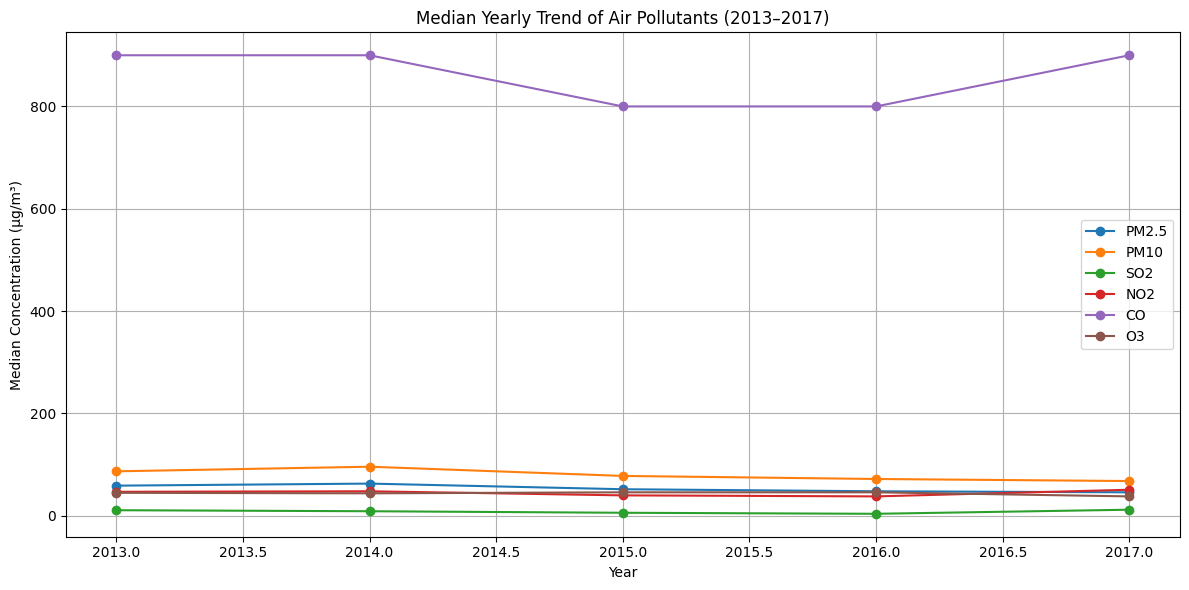

In [ ]:
plt.figure(figsize=(12,6))

for col in polutans:
    plt.plot(yearly_trend.index, yearly_trend[col], marker='o', label=col)

plt.title('Median Yearly Trend of Air Pollutants (2013–2017)')
plt.xlabel('Year')
plt.ylabel('Median Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

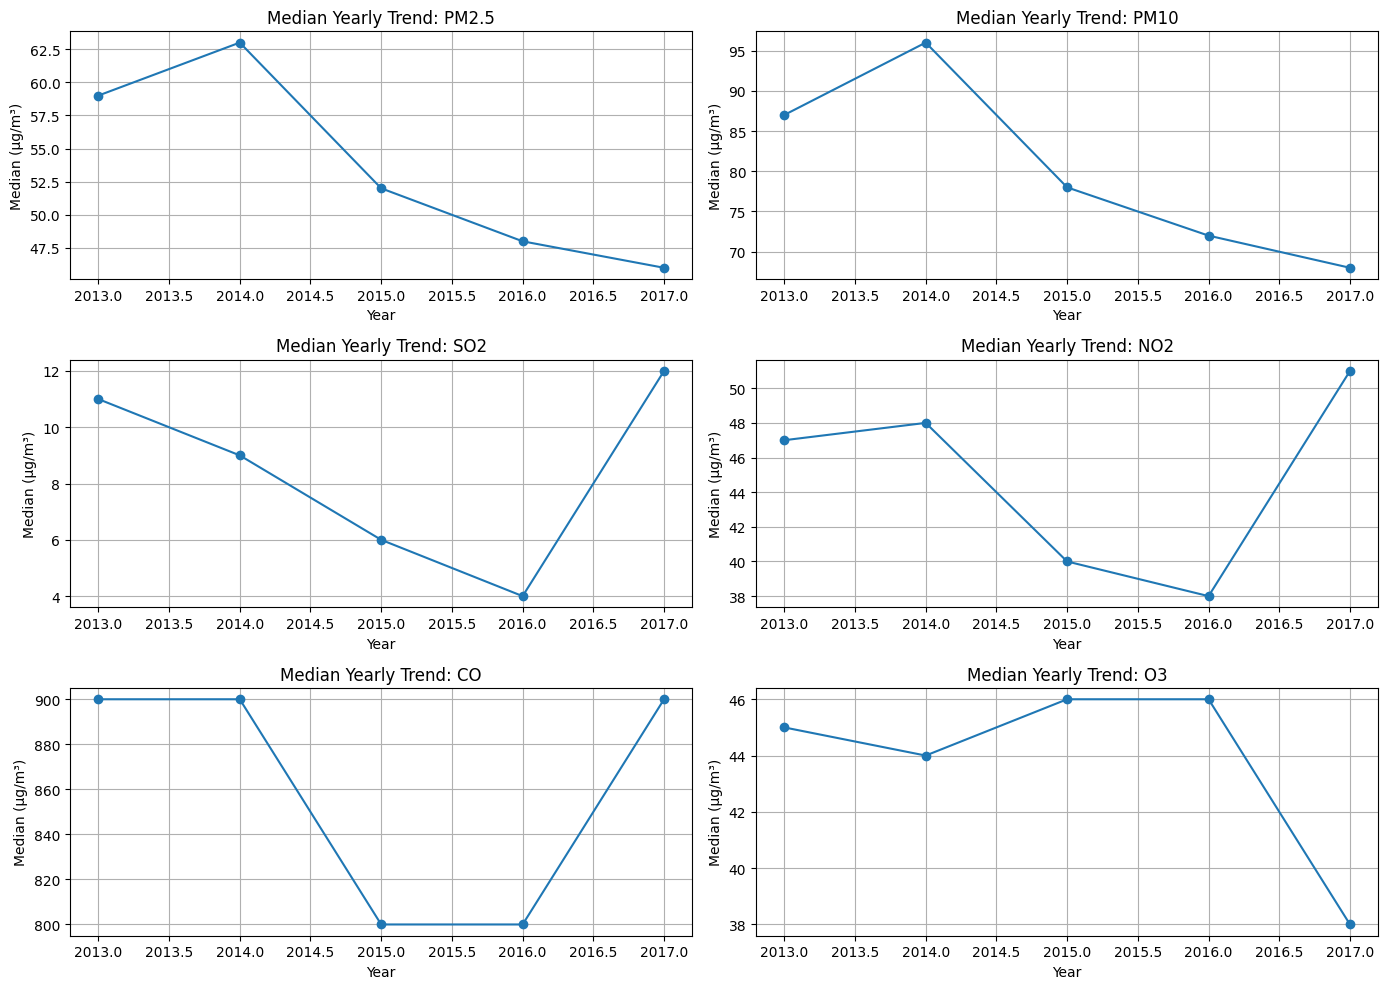

In [ ]:
plt.figure(figsize=(14,10))

for i, col in enumerate(polutans, 1):
    plt.subplot(3, 2, i)
    plt.plot(yearly_trend.index, yearly_trend[col], marker='o', color='tab:blue')
    plt.title(f'Median Yearly Trend: {col}')
    plt.xlabel('Year')
    plt.ylabel('Median (µg/m³)')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
change = yearly_trend.diff().dropna()
change


,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2014,4.0,9.0,-2.0,1.0,0.0,-1.0
2015,-11.0,-18.0,-3.0,-8.0,-100.0,2.0
2016,-4.0,-6.0,-2.0,-2.0,0.0,0.0
2017,-2.0,-4.0,8.0,13.0,100.0,-8.0


In [ ]:
change_sum = change.sum().sort_values()
change_sum

,0
PM10,-19.0
PM2.5,-13.0
O3,-7.0
CO,0.0
SO2,1.0
NO2,4.0


In [ ]:
monthly_trend = df.groupby('month')[polutans].median()
monthly_trend

,PM2.5,PM10,SO2,NO2,CO,O3
month,,,,,,
1,62.0,85.0,21.0,60.0,1400.0,19.0
2,45.0,63.0,16.0,43.0,900.0,40.0
3,70.0,118.0,19.0,57.0,1100.0,51.0
4,61.0,106.0,9.0,42.0,700.0,69.0
5,50.0,93.0,8.0,36.0,700.0,82.0
6,53.0,74.0,4.0,34.0,800.0,83.0
7,59.0,76.0,3.0,31.0,800.0,79.0
8,41.0,60.0,3.0,31.0,700.0,73.0
9,46.0,69.0,3.0,41.0,800.0,42.0


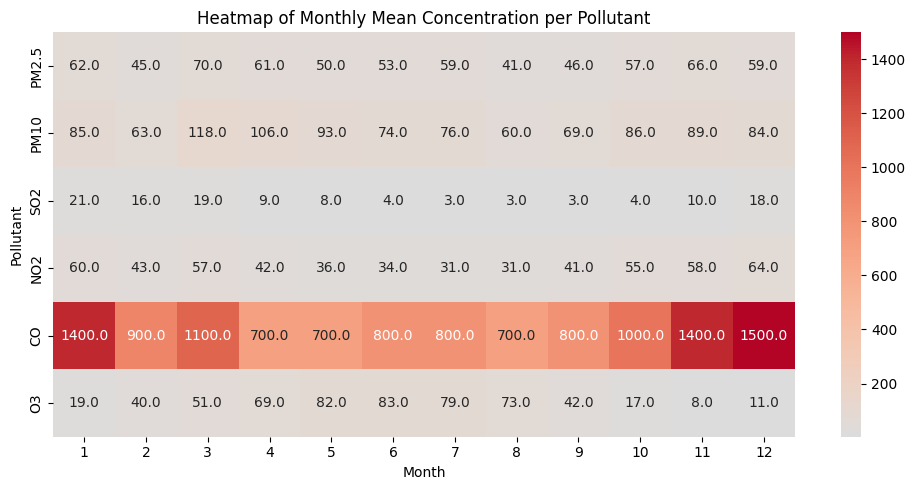

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(monthly_trend.T, annot=True, cmap='coolwarm', center=0, fmt=".1f")
plt.title('Heatmap of Monthly Mean Concentration per Pollutant')
plt.xlabel('Month')
plt.ylabel('Pollutant')
plt.tight_layout()
plt.show()

## Conclusion

### Pertanyaan 1

 Berdasarkan visualisasi, konsentrasi PM2.5 rata-rata tertinggi terjadi pada kondisi Dingin (< 0°C). Hal ini disebabkan oleh kombinasi dari Inversi Termal yang memerangkap polusi di permukaan, dan peningkatan pembakaran untuk pemanas. Kampanye pemasaran harus diintensifkan dan ditargetkan secara agresif pada periode suhu Dingin. Ini adalah peak season (musim puncak) permintaan perlindungan polusi karena risiko kesehatan publik mencapai titik tertinggi.

### Pertanyaan 2
**Bagaimana hubungan antara musim dengan pola kenaikan polusi udara PM2.5 di 12 stasiun pemantau?**

---

Berdasarkan grafik di atas, terlihat adanya tren kenaikan PM2.5 yang cukup jelas pada periode musim dingin, terutama antara bulan September hingga Maret.

Kenaikan ini terutama dipengaruhi oleh:

*   Peningkatan penggunaan pemanas ruangan yang meningkatkan emisi pembakaran
*   rendahnya kecepatan angin
*   terjadinya temperature inversion yang membuat polutan terperangkap di lapisan bawah atmosfer

Kombinasi faktor tersebut menyebabkan konsentrasi PM2.5 cenderung lebih tinggi pada musim dingin dibandingkan musim lainnya.


### Pertanyaan 3

Bagaimana tren kualitas udara dari tahun ke tahun, polutan mana yang paling berkontribusi terhadap penurunan kualitas udara, dan apakah terdapat pola musiman yang konsisten?

---

#### 1. Yearly Trend (2013–2017)
Analisis menunjukkan peningkatan kualitas udara secara keseluruhan:
- **PM2.5 menurun** dari 59 → 46 µg/m³.
- **PM10 menurun** dari 87 → 68 µg/m³.
- **SO₂ menurun tajam** hingga 2016 namun naik kembali pada 2017.
- **NO₂ fluktuatif** dan meningkat pada 2017.
- **CO relatif stabil** di sekitar 800–900 µg/m³.
- **O₃ sedikit menurun**, meskipun berfluktuasi tiap tahun.

**Insight:**  
Polutan partikulat (PM2.5 & PM10) menunjukkan perbaikan signifikan lintas stasiun.  
Namun, peningkatan NO₂ mengindikasikan tantangan besar dari sektor transportasi.

---

#### 2. Year-over-Year Change (Perubahan Tiap Tahun)
Berdasarkan `grafik`:
- **PM10** mengalami penurunan terbesar (**-19**).
- **PM2.5** menurun **-13**.
- **O₃** menurun **-7**.
- **CO** stabil.
- **SO₂** sedikit naik (**+1**).
- **NO₂** naik cukup besar (**+4**).

**Insight:**  
Perbaikan terbesar terjadi pada polutan partikulat.  
NO₂ justru naik → sumber kendaraan masih dominan di seluruh area stasiun.

---

#### 3. Seasonal Pattern (Pola Musiman)
Hasil monthly trend menunjukkan pola musim yang sangat kuat:

##### Musim Dingin (Dec–Feb)
- PM2.5, PM10, SO₂, NO₂, CO **sangat tinggi**.
- Penyebab: pemanas rumah, udara statis, pembakaran domestik.

##### Musim Panas (Jun–Aug)
- O₃ mencapai puncak (82–83).
- Penyebab: reaksi fotokimia akibat sinar matahari dan NO₂/VOC.

##### Musim Semi & Gugur
- Polutan lebih stabil karena hujan & angin membantu menurunkan debu.

**Insight:**  
Musim dingin = polusi ekstrem berbasis pembakaran.  
Musim panas = risiko ozon tinggi (photochemical smog).  
Intervensi harus **berbasis musim + berbasis lokasi**.

---

### Summary
Dataset multi-station menunjukkan bahwa kualitas udara membaik secara signifikan antara 2013–2017 terutama untuk PM2.5, PM10, dan SO₂. Namun, NO₂ meningkat, menggambarkan bahwa aktivitas kendaraan masih menjadi sumber pencemar utama yang sulit dikendalikan. Pola musiman konsisten: musim dingin sangat tercemar, musim panas memiliki peningkatan ozon. Kebijakan pengendalian harus memperhatikan perbedaan sumber polutan dan karakteristik musiman untuk menghasilkan intervensi yang efektif dan berkelanjutan.

